In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('data/diabetes_data.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


In [3]:
diabetes_data.shape

(778, 10)

In [4]:
diabetes_data_new = diabetes_data.copy()

In [5]:
diabetes_data_new['Age'].describe()

count    778.000000
mean      33.317481
std       11.816300
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [6]:
diabetes_data_new['Outcome'] = diabetes_data['Outcome'].apply(lambda x: 'Yes' if x == 1 else 'No')
display(diabetes_data_new)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,No,Female
1,2,112,75,32,0,35.7,0.148,21,No,Female
2,2,108,64,0,0,30.8,0.158,21,No,Female
3,8,107,80,0,0,24.6,0.856,34,No,Female
4,7,136,90,0,0,29.9,0.210,50,No,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,No,Female
774,1,71,48,18,76,20.4,0.323,22,No,Female
775,0,117,0,0,0,33.8,0.932,44,No,Female
776,4,154,72,29,126,31.3,0.338,37,No,Female


In [7]:
mask = diabetes_data_new.duplicated(subset=list(diabetes_data_new.columns))
diabetes_data_duplicates = diabetes_data_new[mask]
diabetes_dedupped = diabetes_data_new.drop_duplicates(subset=list(diabetes_data_new.columns))
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


In [8]:
low_information_cols = [] 

for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [9]:
print(low_information_cols)

['Gender']


In [10]:
information_diabets_data = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_dedupped.shape[1]}')

Результирующее число признаков: 10


In [11]:
display(information_diabets_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,No
1,2,112,75,32,0,35.7,0.148,21,No
2,2,108,64,0,0,30.8,0.158,21,No
3,8,107,80,0,0,24.6,0.856,34,No
4,7,136,90,0,0,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,No
764,1,96,122,0,0,22.4,0.207,27,No
765,10,101,86,37,0,45.6,1.136,38,Yes
766,0,141,0,0,0,42.4,0.205,29,Yes


In [12]:
list_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in list_col:
    information_diabets_data[col] = information_diabets_data[col].apply(lambda x: np.nan if x == 0 else x)
display(information_diabets_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,No
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,No
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,No
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,Yes


In [13]:
cols_null_percent = information_diabets_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

In [14]:
display(information_diabets_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,No
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,No
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,No
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,Yes


In [15]:
diabets_copy_data = information_diabets_data.copy()
m = diabets_copy_data.shape[1] #число признаков после удаления столбцов
combine_data = diabets_copy_data.dropna(thresh=m-2, axis=0)

In [16]:
combine_data.shape[0]

733

In [17]:
display(combine_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,No
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,No
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
762,2,122.0,76.0,27.0,200.0,35.9,0.483,26,No
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,No
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes


In [18]:
indicator_data = combine_data.copy()
list_combine_data =['SkinThickness', 'BloodPressure', 'BMI', 'Glucose']
for col in list_combine_data:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()   
values = {
    'Pregnancies': indicator_data['Pregnancies'],
    'Glucose': indicator_data['Glucose'].median(),
    'BloodPressure': indicator_data['BloodPressure'].median(),
    'SkinThickness': indicator_data['SkinThickness'].median(),
    'BMI': indicator_data['BMI'].median(),
    'DiabetesPedigreeFunction': indicator_data['DiabetesPedigreeFunction'],
    'Age': indicator_data['Age'],
    'Outcome': indicator_data['Outcome']
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропус
indicator_data.isnull().mean()
display(indicator_data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_was_null,BloodPressure_was_null,BMI_was_null,Glucose_was_null
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No,False,False,False,False
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No,False,False,False,False
2,2,108.0,64.0,29.0,NaN,30.8,0.158,21,No,True,False,False,False
3,8,107.0,80.0,29.0,NaN,24.6,0.856,34,No,True,False,False,False
4,7,136.0,90.0,29.0,NaN,29.9,0.210,50,No,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2,122.0,76.0,27.0,200.0,35.9,0.483,26,No,False,False,False,False
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No,False,False,False,False
764,1,96.0,122.0,29.0,NaN,22.4,0.207,27,No,True,False,False,False
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes,False,False,False,False


In [19]:
print(round(indicator_data['SkinThickness'].mean(),1))

29.1


In [20]:
indicator_data = indicator_data.drop(['SkinThickness_was_null', 'BloodPressure_was_null', 'BMI_was_null', 'Glucose_was_null'], axis=1)

In [21]:
display(indicator_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No
2,2,108.0,64.0,29.0,NaN,30.8,0.158,21,No
3,8,107.0,80.0,29.0,NaN,24.6,0.856,34,No
4,7,136.0,90.0,29.0,NaN,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
762,2,122.0,76.0,27.0,200.0,35.9,0.483,26,No
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No
764,1,96.0,122.0,29.0,NaN,22.4,0.207,27,No
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes


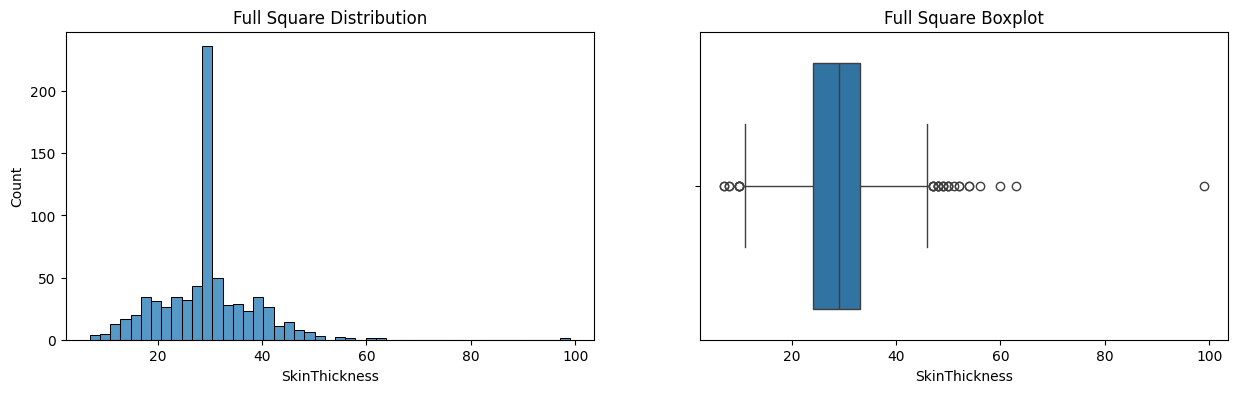

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=indicator_data, x='SkinThickness', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=indicator_data, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [23]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(indicator_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 32
Результирующее число записей: 701


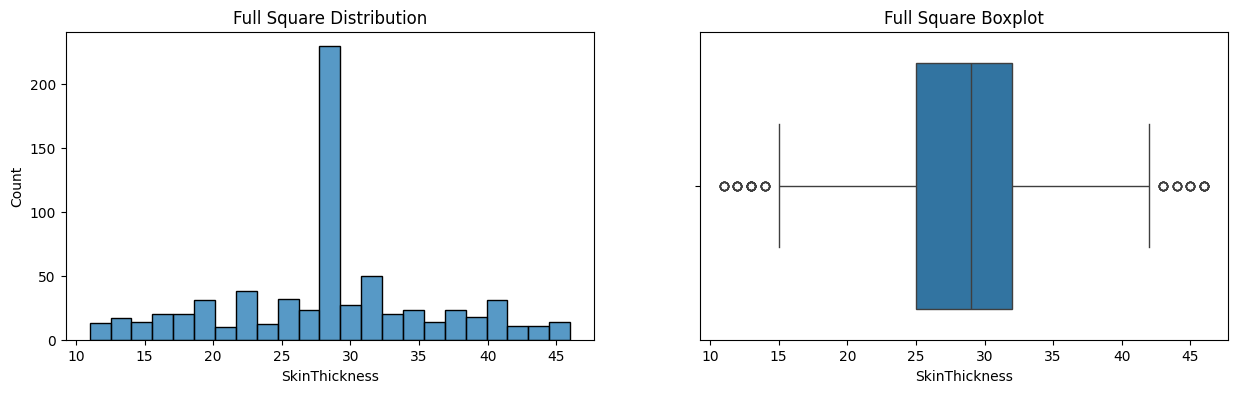

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [25]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(indicator_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 730


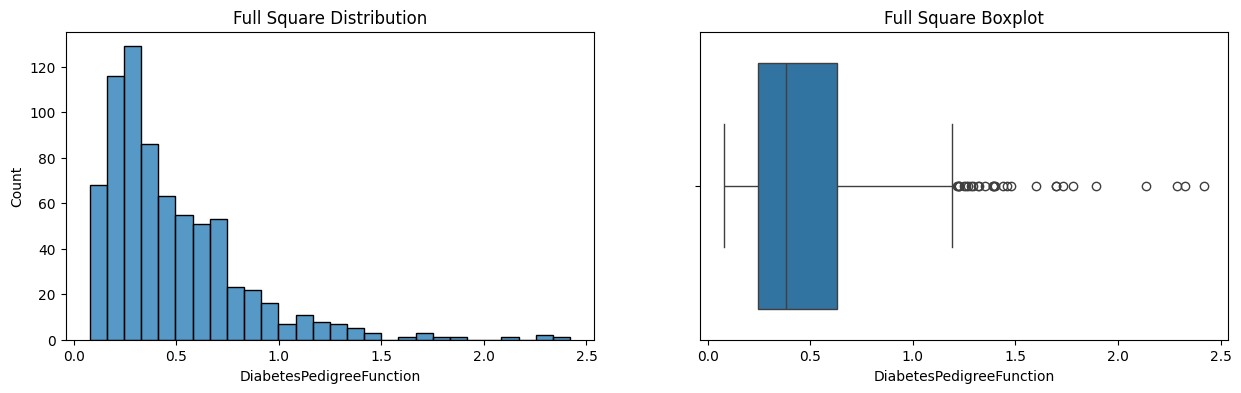

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=indicator_data, x='DiabetesPedigreeFunction', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=indicator_data, x='DiabetesPedigreeFunction', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [27]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(indicator_data, 'DiabetesPedigreeFunction')
a = outliers.shape[0]


In [28]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(indicator_data, 'DiabetesPedigreeFunction', log_scale=True)
b = outliers.shape[0]

In [29]:
print(a-b)

29


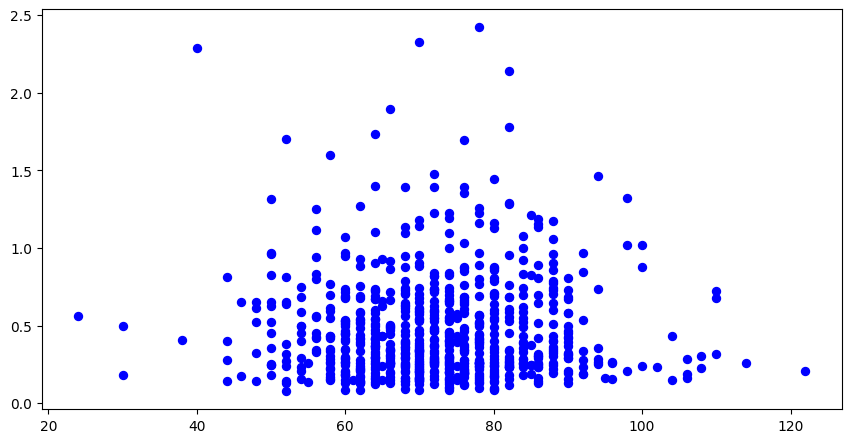

In [30]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=indicator_data['BloodPressure'], 
    y=indicator_data['DiabetesPedigreeFunction'], 
    s=33,
    marker='o',
    c = 'blue'
);

In [31]:
display(indicator_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,No
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,No
2,2,108.0,64.0,29.0,NaN,30.8,0.158,21,No
3,8,107.0,80.0,29.0,NaN,24.6,0.856,34,No
4,7,136.0,90.0,29.0,NaN,29.9,0.210,50,No
...,...,...,...,...,...,...,...,...,...
762,2,122.0,76.0,27.0,200.0,35.9,0.483,26,No
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,No
764,1,96.0,122.0,29.0,NaN,22.4,0.207,27,No
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,Yes


In [32]:
# NEW_TASK

In [33]:
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [34]:
Data_Parsing = pd.read_excel('data/Data_TSUM.xlsx')

In [35]:
Data_Company = pd.read_excel('data/Data_Company.xlsx')
display(Data_Company)

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [36]:
def remove_symbols(symb):
    list_word = []
    list_symbols = ['_', '-', '~', '\\', '/']
    for i in range(len(symb)):
        if symb[i] not in list_symbols:
            list_word.append(symb[i])
    word = ''.join(list_word)
    return word

Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(remove_symbols)
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(remove_symbols)
display(Data_Parsing)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [37]:
Data_Parsing['item_id'] = Data_Company['item_id']
Data_Parsing['color_id'] = Data_Company['color_id']
Data_Parsing['current price'] = Data_Company['current price']
display(Data_Parsing)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


In [38]:
Data_Parsing['difference_prices'] = round(((Data_Parsing['price'] - Data_Parsing['current price'])/(Data_Parsing['current price']))*100,2)
display(Data_Parsing)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,difference_prices
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.61
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.39
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.80
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.32


In [39]:
Data_Parsing['difference_mean_prices'] = Data_Parsing['current price'].mean() - Data_Parsing['current price'] 
display(Data_Parsing)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,difference_prices,difference_mean_prices
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.39,-24.6
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.77,61.4
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.37,-11.6
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.37,55.4
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.40,69.4
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.61,57.4
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.39,26.4
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.80,-13.6
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.32,0.4


In [54]:
Data_Parsing.loc[70,'brand']

'Stone Island'

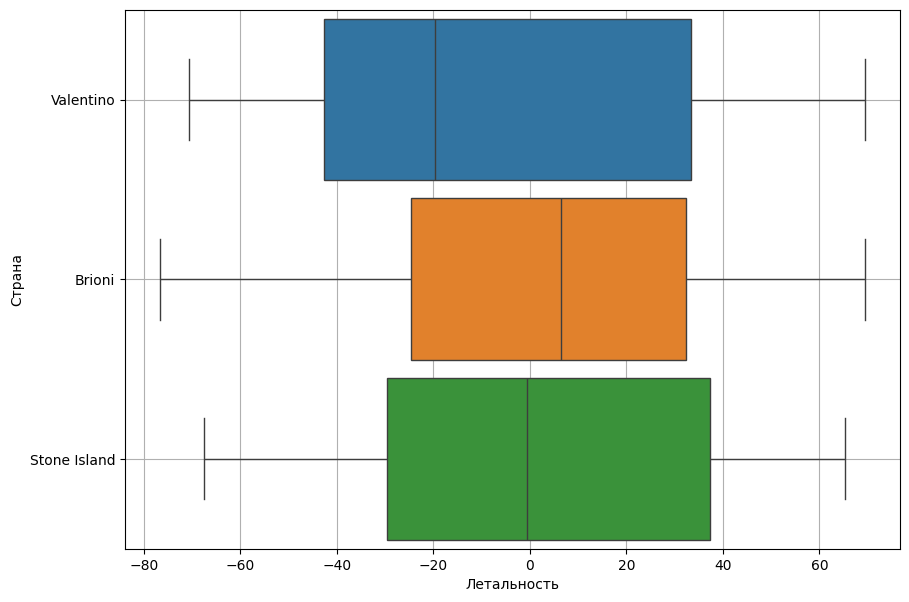

In [45]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=Data_Parsing,
    y='brand',
    x='difference_mean_prices',
    orient='h',
    hue='brand',
    width=0.9
)
boxplot.set_title('');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [46]:
Valentino_brand = Data_Parsing[Data_Parsing['brand'] == 'Valentino']
Brioni_brand = Data_Parsing[Data_Parsing['brand'] == 'Brioni']
Stone_Island_brand = Data_Parsing[Data_Parsing['brand'] == 'Stone Island']

In [48]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(Stone_Island_brand, 'difference_mean_prices')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 25


In [49]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(Stone_Island_brand, 'difference_mean_prices', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 12


/Users/Sasha/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
Data_Parsing.shape

(75, 10)

In [51]:
Data_Parsing.to_excel('data/Data_Parsing_New.xlsx')